# Dataset

## Download dataset
Vietnamese Students' Feedback Corpus (UIT-VSFC) is the resource consists of over 16,000 sentences which are human-annotated with two different tasks: sentiment-based and topic-based classifications.

[1] Kiet Van Nguyen, Vu Duc Nguyen, Phu Xuan-Vinh Nguyen, Tham Thi-Hong Truong, Ngan Luu-Thuy Nguyen, UIT-VSFC: Vietnamese Students' Feedback Corpus for Sentiment Analysis,  2018 10th International Conference on Knowledge and Systems Engineering (KSE 2018), November 1-3, 2018, Ho Chi Minh City, Vietnam

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

dataset = load_dataset("uitnlp/vietnamese_students_feedback")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/11426 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1583 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3166 [00:00<?, ? examples/s]

## Interacting with the downloaded data

In [3]:
train_set = dataset['train']
train_set

Dataset({
    features: ['sentence', 'sentiment', 'topic'],
    num_rows: 11426
})

In [4]:
train_set[0]

{'sentence': 'slide giáo trình đầy đủ .', 'sentiment': 2, 'topic': 1}

In [5]:
len(train_set)

11426

## Split a sentence

In [6]:
# Read a sentence
example_word_list = train_set[0]['sentence']
example_word_list

'slide giáo trình đầy đủ .'

In [7]:
# Split sentence word-by-word
example_word_list.split()

['slide', 'giáo', 'trình', 'đầy', 'đủ', '.']

In [8]:
# Join words into 1 full sentence
sentence = ""
for word in example_word_list:
    sentence += word
sentence

'slide giáo trình đầy đủ .'

In [9]:
# Get 10 sentences to process
sentence_list = []
for idx in range(10):
    sentence = ""
    for word in train_set[idx]['sentence']:
        sentence += word
    sentence_list.append(sentence)
sentence_list

['slide giáo trình đầy đủ .',
 'nhiệt tình giảng dạy , gần gũi với sinh viên .',
 'đi học đầy đủ full điểm chuyên cần .',
 'chưa áp dụng công nghệ thông tin và các thiết bị hỗ trợ cho việc giảng dạy .',
 'thầy giảng bài hay , có nhiều bài tập ví dụ ngay trên lớp .',
 'giảng viên đảm bảo thời gian lên lớp , tích cực trả lời câu hỏi của sinh viên , thường xuyên đặt câu hỏi cho sinh viên .',
 'em sẽ nợ môn này , nhưng em sẽ học lại ở các học kỳ kế tiếp .',
 'thời lượng học quá dài , không đảm bảo tiếp thu hiệu quả .',
 'nội dung môn học có phần thiếu trọng tâm , hầu như là chung chung , khái quát khiến sinh viên rất khó nắm được nội dung môn học .',
 'cần nói rõ hơn bằng cách trình bày lên bảng thay vì nhìn vào slide .']

# Text processing

## N-grams
- N-grams are continuous sequences of words or symbols, or tokens in a document. In technical terms, they can be defined as the neighboring sequences of items in a document.
- We can use n-grams or multiple other text preprocessing algorithms by incorporating [`nltk`](https://www.nltk.org/) and [`scikit-learn`](https://scikit-learn.org/) library.

In [10]:
example_sentence = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [11]:
from nltk import ngrams
import numpy as np

num_of_grams = np.arange(1, 4, 1) # Test 3 n-grams

print("Original sentence:", example_sentence[1])
print("==="*5)

# Test multiple n-grams values
for gram in num_of_grams:
    # Conduct the n-grams on 1 example sentence by NLTK
    splitted_sentence = ngrams(example_sentence[1].split(), gram)
    print(f"{gram}-gram: ",end ='')

    # Connect splitted results into 1 list
    n_grams_list = [' '.join(grams) for grams in splitted_sentence]
    print(n_grams_list)
    print()

Original sentence: This document is the second document.
1-gram: ['This', 'document', 'is', 'the', 'second', 'document.']

2-gram: ['This document', 'document is', 'is the', 'the second', 'second document.']

3-gram: ['This document is', 'document is the', 'is the second', 'the second document.']



## Extract features with n-grams

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
count_vectorize_model = CountVectorizer(ngram_range = (1, 1))
n_grams_feature_vector = count_vectorize_model.fit_transform(example_sentence).toarray()
word_frequency = pd.DataFrame(data = n_grams_feature_vector, columns = count_vectorize_model.get_feature_names_out())
word_frequency.T

,0,1,2,3
and,0,0,1,0
document,1,2,0,1
first,1,0,0,1
is,1,1,1,1
one,0,0,1,0
second,0,1,0,0
the,1,1,1,1
third,0,0,1,0
this,1,1,1,1


In [14]:
count_vectorize_model = CountVectorizer(ngram_range = (1, 1))

n_grams_feature_vector = count_vectorize_model.fit_transform([sentence_list[5]]).toarray()

word_frequency = pd.DataFrame(data = n_grams_feature_vector, columns = count_vectorize_model.get_feature_names_out())

print('Example sentence:', sentence_list[5])
word_frequency

Example sentence: giảng viên đảm bảo thời gian lên lớp , tích cực trả lời câu hỏi của sinh viên , thường xuyên đặt câu hỏi cho sinh viên .


,bảo,cho,câu,của,cực,gian,giảng,hỏi,lên,lớp,lời,sinh,thường,thời,trả,tích,viên,xuyên,đảm,đặt
0,1,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,3,1,1,1


In [15]:
count_vectorize_model = CountVectorizer(ngram_range = (1, 2))

n_grams_feature_vector = count_vectorize_model.fit_transform(example_sentence).toarray()

word_frequency = pd.DataFrame(data = n_grams_feature_vector, columns = count_vectorize_model.get_feature_names_out())
word_frequency.T

,0,1,2,3
and,0,0,1,0
and this,0,0,1,0
document,1,2,0,1
document is,0,1,0,0
first,1,0,0,1
first document,1,0,0,1
is,1,1,1,1
is the,1,1,1,0
is this,0,0,0,1
one,0,0,1,0


## Problem set 1
Based on the UIT-VSFC dataset and the aforementioned information.
- (1a) Create an $n$-gram word frequency table, such that $n$ could be any number of your desire.
- (1b) With $n=1$ and $n=2$, what is the most popular word in the dataset ?
- (1c) With $n=1$ and $n=2$, what is the rarest word in the dataset ?
- (1d) What are the limitations of this data processing flow ? How can we overcome those ?


### Retrieve all sentences within the dataset

In [16]:
from typing import List

def get_all_sentences(dataset) -> List[str]:
    """
    Function to get all sentences and store them into a list of strings

    Args:
    dataset -- The subset (i.e., train/valid/test) in UIT-VSFC dataset

    Returns:
    A list of all sentences in a subset data of the UIT-VSFC.
    """

    list_all_sentence: list = []

    ### YOUR CODE STARTS HERE

    for datapoint in dataset:
      sentence = datapoint['sentence']
      # Combine all words in the sentence into a single string
      sentence = ''.join(sentence)
      list_all_sentence.append(sentence)


    ### YOUR CODE ENDS HERE

    return list_all_sentence

In [17]:
list_all_sentence: list = get_all_sentences(train_set)
print(f"#sentences within the dataset: {len(list_all_sentence)}")
print(f"Example sentence: {list_all_sentence[0]}")

#sentences within the dataset: 11426
Example sentence: slide giáo trình đầy đủ .


### 1a. Build the word frequency table

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
def n_gram_word_frequency(sentence_list: list, n: int) -> pd.DataFrame:
  """
  Function to build a word frequency table based on n-grams

  Args:
    sentence_list (list) -- A list of all sentences needed for table constructing process
    n (int) -- Number of grams that we parse into this function

  Returns:
    A dataframe contains all words after conducting n-grams and their respective frequencies
  """
  # Create a count vectorizer model
  count_vectorize_model = CountVectorizer(ngram_range=(n, n))

  # Fit the model on the sentence list to learn the vocabulary
  n_grams_feature_vector = count_vectorize_model.fit_transform(sentence_list).toarray()

  # Convert the feature vector into a pandas dataframe for easier manipulation
  word_frequency_table = pd.DataFrame(
      data=n_grams_feature_vector,
      columns=count_vectorize_model.get_feature_names_out()
  )

  return word_frequency_table




### 1b. Which is the most and the rarest word in dataset **(1-gram)**

In [19]:
#Create word frequency with n-gram = 1
word_frequency_table_1_gram = n_gram_word_frequency(sentence_list=list_all_sentence, n=1)

print("## Word Frequency Table (Unigrams)")
word_frequency_table_1_gram.T




## Word Frequency Table (Unigrams)


,0,1,2,3,4,5,6,7,8,9,...,11416,11417,11418,11419,11420,11421,11422,11423,11424,11425
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10h30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ổn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ủa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ủng,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ức,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
word_frequency_table_1_gram

,10,100,10h,10h30,11,11doubledot55,11h30,11h55,12,12doubledot00,...,ấy,ẩn,ắt,ốc,ồn,ổn,ủa,ủng,ức,ứng
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#calculate the sum of word using 1-gram
sum_word = word_frequency_table_1_gram.sum()
# Change Series to DataFrame
sum_word_df = sum_word.to_frame()

#Rename column
sum_word_df.columns = ['sum_word']

#Print dataframe
sum_word_df




,sum_word
10,19
100,6
10h,1
10h30,1
11,1
...,...
ổn,18
ủa,1
ủng,1
ức,1


In [22]:
# Sort in descending order
sum_word_df_sorted_desc = sum_word_df.sort_values(by='sum_word',ascending = False)

#print
sum_word_df_sorted_desc

,sum_word
viên,4803
giảng,3711
dạy,3156
thầy,3095
sinh,3082
...,...
dưỡng,1
trộn,1
lốc,1
bạnem,1


The most popular word in dataset is **"viên"** (4803)

In [23]:
# Sort in ascending order
sum_word_df_sorted_asc = sum_word_df.sort_values(by='sum_word')

#Print
sum_word_df_sorted_asc


,sum_word
nhó,1
wzjwz243,1
lủng,1
wzjwz244,1
lờ,1
...,...
sinh,3082
thầy,3095
dạy,3156
giảng,3711


In [24]:
#Print word whose occurrence count is 1
the_most_rarest_word = (sum_word_df_sorted_asc[sum_word_df_sorted_asc['sum_word'] == 1].T).columns.tolist()
the_most_rarest_word

['nhó',
 'wzjwz243',
 'lủng',
 'wzjwz244',
 'lờ',
 'wzjwz245',
 'wzjwz246',
 'wzjwz247',
 'lỳ',
 'lốc',
 'wzjwz249',
 'lẻ',
 'lẹ',
 'lặt',
 'wzjwz25',
 'wzjwz250',
 'lắc',
 'lỏng',
 'wzjwz251',
 'ma',
 'wzjwz241',
 'muôn',
 'murray',
 'wzjwz236',
 'wzjwz237',
 'miệt',
 'miss',
 'mini',
 'wzjwz242',
 'wzjwz238',
 'microphone',
 'wzjwz239',
 'mfc',
 'message',
 'max',
 'matlab',
 'wzjwz24',
 'microsoft',
 'wzjwz235',
 'lận',
 'wzjwz253',
 'wzjwz269',
 'lâp',
 'lát',
 'wzjwz27',
 'wzjwz270',
 'luồng',
 'luật',
 'lãnh',
 'wzjwz272',
 'wzjwz274',
 'luyên',
 'loạn',
 'wzjwz276',
 'wzjwz277',
 'liệt',
 'liều',
 'wzjwz273',
 'wzjwz252',
 'lèo',
 'wzjwz265',
 'wzjwz255',
 'lấn',
 'lảng',
 'lạm',
 'wzjwz256',
 'wzjwz257',
 'wzjwz259',
 'lê',
 'lước',
 'wzjwz262',
 'lõng',
 'lông',
 'wzjwz263',
 'wzjwz264',
 'lí',
 'lênin',
 'wzjwz26',
 'liêu',
 'wzjwz233',
 'mài',
 'nghiền',
 'wzjwz2',
 'wzjwz201',
 'nghi',
 'wzjwz202',
 'wzjwz203',
 'ngang',
 'wzjwz199',
 'nfc',
 'wzjwz204',
 'nang',
 'naive',


The least frequent word is the word that appears only once and is stored in the **"the_most_rarest_word"** variable

###1c. Which is the most and the rarest word in dataset (2-gram)

In [25]:
#Create word frequency with n-gram = 2
word_frequency_table_2_gram = n_gram_word_frequency(sentence_list=list_all_sentence, n=2)

print("## Word Frequency Table (Unigrams)")
word_frequency_table_2_gram.T

## Word Frequency Table (Unigrams)


,0,1,2,3,4,5,6,7,8,9,...,11416,11417,11418,11419,11420,11421,11422,11423,11424,11425
10 50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 bài,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 fraction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 kiến,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 luôn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ứng đáp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ứng đúng,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ứng được,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ứng đầy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#calculate the sum of word using 2-gram
sum_word = word_frequency_table_2_gram.sum()
# Change Series to DataFrame
sum_word_df = sum_word.to_frame()

#Rename column
sum_word_df.columns = ['sum_word']

#Print dataframe
sum_word_df




,sum_word
10 50,1
10 bài,1
10 fraction,1
10 kiến,1
10 luôn,1
...,...
ứng đáp,1
ứng đúng,1
ứng được,18
ứng đầy,1


In [27]:
# Sort in descending order
sum_word_df_sorted_desc = sum_word_df.sort_values(by='sum_word',ascending = False)

#print
sum_word_df_sorted_desc

,sum_word
sinh viên,2698
nhiệt tình,1848
giảng viên,1610
bài tập,1057
dễ hiểu,1004
...,...
như ma,1
như lời,1
như lớp,1
như lên,1


The most popular word in dataset is **"sinh viên"** (2698)

In [28]:
# Sort in ascending order
sum_word_df_sorted_asc = sum_word_df.sort_values(by='sum_word')

#Print
sum_word_df_sorted_asc

,sum_word
10 50,1
môn wzjwz75,1
môn wzjwz52,1
môn wzjwz149,1
môn wzjwz130,1
...,...
dễ hiểu,1004
bài tập,1057
giảng viên,1610
nhiệt tình,1848


In [29]:
#Print word whose occurrence count is 1
the_most_rarest_word = (sum_word_df_sorted_asc[sum_word_df_sorted_asc['sum_word'] == 1].T).columns.tolist()
the_most_rarest_word

['10 50',
 'môn wzjwz75',
 'môn wzjwz52',
 'môn wzjwz149',
 'môn wzjwz130',
 'môn wzjwz129',
 'môn wzjwz121',
 'tìm nhiều',
 'tìm phương',
 'môn về',
 'tìm thêm',
 'môn vật',
 'môn võ',
 'tìm thông',
 'môn từ',
 'tìm thấy',
 'môn xem',
 'môn xác',
 'môn xã',
 'môn đi',
 'mượn cho',
 'mưa hoặc',
 'mơ thành',
 'tìm gặp',
 'tìm hiêu',
 'mơ học',
 'măng chặn',
 'môn tận',
 'mùa hè',
 'tìm lối',
 'tìm lỗi',
 'môn đại',
 'môn đó',
 'môn đòi',
 'môn đáng',
 'tìm mọi',
 'mù mờ',
 'môn tấn',
 'tìm từ',
 'tìm được',
 'môn patin',
 'môn oop',
 'môn nên',
 'tình chăm',
 'tình chạy',
 'môn nhưng',
 'môn như',
 'môn php',
 'môn nha',
 'môn ngoại',
 'môn nghề',
 'môn nay',
 'môn một',
 'tình chất',
 'tình chắc',
 'tình chắt',
 'môn ngôn',
 'mượn kit',
 'môn phân',
 'tình chính',
 'tìm đủ',
 'môn tiết',
 'môn tiếng',
 'môn tiên',
 'tình buồn',
 'tình bên',
 'môn thì',
 'tình chút',
 'môn thiên',
 'môn sâu',
 'tình chuyên',
 'môn rộng',
 'môn rồi',
 'tình chuẩn',
 'môn ráng',
 'môn quản',
 'môn thay',


The least frequent word is the word that appears only once and is stored in the **"the_most_rarest_word"** variable

###1.d What are the limitations of this data processing flow ? How can we overcome those ?


####**LIMITATIONS** and **OVERCOME**

# **Limitations:**
## 1.   Sensitivity to data sparsity:
If n too high can lead to poor performance on unseen data
## 2.   Limited context capture:
If n too low N-grams only consider a fixed-length sequence of words. This can miss long-range dependencies and context in a sentence
## 3.   Data size limitations:
Especially for higher n-grams, requires a large amount of data.

# **Overcoming Limitations:**
## 1.     Smoothing techniques:
Adjust probabilities for unseen n-grams, improving performance on unseen data.
## 2.    Balance order n-grams:
A balance needs to be found between context and data availability.

## Stopwords

In [30]:
# Retrieve the stopword dictionary
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt

--2024-04-17 16:08:07--  https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20475 (20K) [text/plain]
Saving to: ‘vietnamese-stopwords.txt’

vietnamese-stopword 100%[===================>]  20.00K  --.-KB/s    in 0s      

2024-04-17 16:08:07 (89.0 MB/s) - ‘vietnamese-stopwords.txt’ saved [20475/20475]



In [31]:
# Observe stopwords list
vietnamese_stopword = open('vietnamese-stopwords.txt', 'r').read()
vietnamese_stopword = vietnamese_stopword.split('\n') # Separate lines by lines
print(f"#Number of stop words: {len(vietnamese_stopword)}")

#Number of stop words: 1942


In [32]:
# Stop words example
for sentence in vietnamese_stopword[:10]:
    print(sentence)

a lô
a ha
ai
ai ai
ai nấy
ai đó
alô
amen
anh
anh ấy


## Term frequency - Invert document frequency (TF-IDF)


### TF
Term frequency (TF) is the number of times a given term appears in document

$$
tf(t) = f(t,d)\times\frac{1}{T}
$$
whereas, $f(t,d)$ is the frequency of the word $t$ in the document $d$, $T$ is the number of all words in that document.

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Declare TF vectorize
tf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                                use_idf=False, # only using TF
                                norm='l1')

# Fit the TF model to the given corpus
tf_vectorizer.fit_transform(corpus)

# Build TF table
tf_vectorized = tf_vectorizer.transform(corpus)
tf_output = tf_vectorized[0]

# Construct the Dataframe to store and visualize result
words_tf_idf = pd.DataFrame(tf_output.T.todense(), index=tf_vectorizer.get_feature_names_out(), columns=['tf'])
words_tf_idf

,tf
and,0.0
document,0.2
first,0.2
is,0.2
one,0.0
second,0.0
the,0.2
third,0.0
this,0.2


### IDF

Inverse Document Frequency, or abbreviated as IDF, measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones.

$$
idf(t) = \log\left(\frac{\text{#documents in the document set}}{\text{#documents with term}}\right) + 1
$$

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Configure settings for IDF vectorize
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                                    smooth_idf=False,
                                    use_idf=True,
                                    norm=None)

tf_idf_vectorizer.fit_transform(corpus)

# Retrieve only idf information
idf_vectorizer = tf_idf_vectorizer.idf_

# Join idf values into the previous dataframe
words_tf_idf['idf'] = idf_vectorizer

# Show dataframe with ascending values of idf
words_tf_idf.sort_values(by=['idf'])

,tf,idf
is,0.2,1.000000
the,0.2,1.000000
this,0.2,1.000000
document,0.2,1.287682
first,0.2,1.693147
and,0.0,2.386294
one,0.0,2.386294
second,0.0,2.386294
third,0.0,2.386294


### TF-IDF

Technically saying, TF-IDF is a score which is applied to every word in every document in our dataset. And for every word, the TF-IDF value increases with every appearance of the word in a document, but is gradually decreased with every appearance in other documents

$$
\text{tf-idf}= tf(t, d) \times idf(t)
$$

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Construct the TF-IDF model
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                                    smooth_idf=False,
                                    use_idf=True,
                                    norm='l1')

# Fit the model into the given corpus
tf_idf_vectorizer.fit_transform(corpus)

# Build the TF-IDF table
tf_idf_vectorized = tf_idf_vectorizer.transform(corpus)
tf_idf_output = tf_idf_vectorized[0]

# Add tf-idf columns into the existing dataframe
words_tf_idf['tf-idf'] = tf_idf_output.T.todense()
words_tf_idf.sort_values(by=['tf-idf'])

,tf,idf,tf-idf
and,0.0,2.386294,0.000000
one,0.0,2.386294,0.000000
second,0.0,2.386294,0.000000
third,0.0,2.386294,0.000000
is,0.2,1.000000,0.167201
the,0.2,1.000000,0.167201
this,0.2,1.000000,0.167201
document,0.2,1.287682,0.215302
first,0.2,1.693147,0.283096


## Problem set 2
Based on the problem 1 and the instruction on TF, IDF, TF-IDF:
- (2a) Build the tf-idf table for the UIT-VSFC dataset with $n$-gram = 1 and $n$-gram = 2.
- (2b) Change a few hyperparameters in the `TfidfVectorizer` function (`smooth_idf`, `sublinear_tf` and `norm`) from problem 2a (*you could browse from this [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to discover which are the correct paramters to parse*). Explain the results differences collected after modifying hyperparameters.
- (2c) Which words has the lowest and the highest tf-idf values ? Do they differ from $n$-grams results ?
- (2d) Which limitations from $n$-grams that TF-IDF overcame ? Does TF-IDF remain any limitations ?

###2.a Build the tf-idf table for the UIT-VSFC dataset with  n -gram = 1 and  n -gram = 2.

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf_table_1(sentence_list: list, n: int) -> pd.DataFrame:
  """
  Function to build a TF-IDF table based on n-grams

  Args:
    sentence_list (list) -- A list of all sentences needed for table constructing process
    n (int) -- Number of grams that we parse into this function

  Returns:
    A dataframe contains all words after conducting n-grams and their respective TF-IDF score

  """
    # Construct the TF-IDF model
  tf_idf_vectorizer = TfidfVectorizer(ngram_range=(n, n),
                                    smooth_idf=False,
                                    use_idf=True,
                                    norm='l1')

  # Fit the model into the given corpus
  tf_idf_vectorizer.fit_transform(sentence_list)

  # Build the TF-IDF table
  tf_idf_vectorized = tf_idf_vectorizer.transform(sentence_list)
  tf_idf_output = tf_idf_vectorized[0]

  # Add tf-idf columns into the dataframe
  words_tf_idf = pd.DataFrame(tf_idf_output.T.todense(), index=tf_idf_vectorizer.get_feature_names_out(), columns=['tf-idf-2a'])

  return words_tf_idf

In [61]:
#1-grams
tf_idf_table_1_grams_1 = tf_idf_table_1(sentence_list=list_all_sentence, n=1)
tf_idf_table_1_grams_1

,tf-idf-2a
10,0.0
100,0.0
10h,0.0
10h30,0.0
11,0.0
...,...
ổn,0.0
ủa,0.0
ủng,0.0
ức,0.0


In [62]:
#2-grams
tf_idf_table_2_grams_1 = tf_idf_table_1(sentence_list=list_all_sentence, n=2)
tf_idf_table_2_grams_1

,tf-idf-2a
10 50,0.0
10 bài,0.0
10 fraction,0.0
10 kiến,0.0
10 luôn,0.0
...,...
ứng đáp,0.0
ứng đúng,0.0
ứng được,0.0
ứng đầy,0.0


###2.b Change a few hyperparameters in the `TfidfVectorizer` function (`smooth_idf`, `sublinear_tf` and `norm`) from problem 2a

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf_table_2(sentence_list: list, n: int) -> pd.DataFrame:
  """
  Function to build a TF-IDF table based on n-grams

  Args:
    sentence_list (list) -- A list of all sentences needed for table constructing process
    n (int) -- Number of grams that we parse into this function

  Returns:
    A dataframe contains all words after conducting n-grams and their respective TF-IDF score

  """
    # Construct the TF-IDF model
  tf_idf_vectorizer = TfidfVectorizer(ngram_range=(n, n),
                                    smooth_idf=True,
                                    use_idf=True,
                                    sublinear_tf=True,
                                    norm='l2')

  # Fit the model into the given corpus
  tf_idf_vectorizer.fit_transform(sentence_list)

  # Build the TF-IDF table
  tf_idf_vectorized = tf_idf_vectorizer.transform(sentence_list)
  tf_idf_output = tf_idf_vectorized[0]

  # Add tf-idf columns into the existing dataframe
  words_tf_idf = pd.DataFrame(tf_idf_output.T.todense(), index=tf_idf_vectorizer.get_feature_names_out(), columns=['tf-idf-2b'])

  return words_tf_idf

In [64]:
tf_idf_table_1_grams_2 = tf_idf_table_2(sentence_list=list_all_sentence, n=1)
tf_idf_table_1_grams_2

,tf-idf-2b
10,0.0
100,0.0
10h,0.0
10h30,0.0
11,0.0
...,...
ổn,0.0
ủa,0.0
ủng,0.0
ức,0.0


In [65]:
tf_idf_table_2_grams_2 = tf_idf_table_2(sentence_list=list_all_sentence, n=2)
tf_idf_table_2_grams_2

,tf-idf-2b
10 50,0.0
10 bài,0.0
10 fraction,0.0
10 kiến,0.0
10 luôn,0.0
...,...
ứng đáp,0.0
ứng đúng,0.0
ứng được,0.0
ứng đầy,0.0


In [67]:
#combine 2 tf-idf tables of 1-grams
df_combined_1_grams = pd.concat([tf_idf_table_1_grams_1, tf_idf_table_1_grams_2], axis=1)
print(df_combined_1_grams)

       tf-idf-2a  tf-idf-2b
10           0.0        0.0
100          0.0        0.0
10h          0.0        0.0
10h30        0.0        0.0
11           0.0        0.0
...          ...        ...
ổn           0.0        0.0
ủa           0.0        0.0
ủng          0.0        0.0
ức           0.0        0.0
ứng          0.0        0.0

[2459 rows x 2 columns]


       tf-idf-2a  tf-idf-2b  difference
10           0.0        0.0         0.0
100          0.0        0.0         0.0
10h          0.0        0.0         0.0
10h30        0.0        0.0         0.0
11           0.0        0.0         0.0
...          ...        ...         ...
ổn           0.0        0.0         0.0
ủa           0.0        0.0         0.0
ủng          0.0        0.0         0.0
ức           0.0        0.0         0.0
ứng          0.0        0.0         0.0

[2459 rows x 3 columns]


array([[<Axes: title={'center': 'tf-idf-2a'}>,
        <Axes: title={'center': 'tf-idf-2b'}>],
       [<Axes: title={'center': 'difference'}>, <Axes: >]], dtype=object)

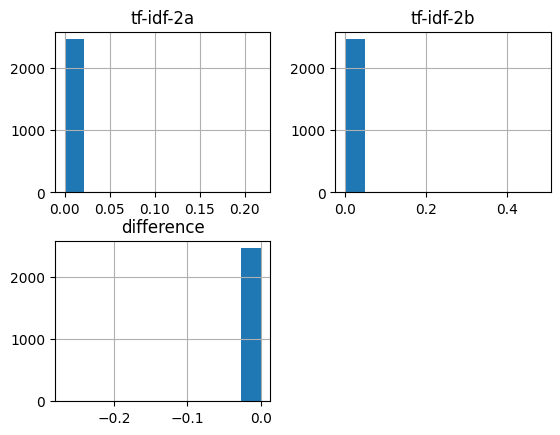

In [94]:
df_combined_1_grams['difference'] = df_combined_1_grams['tf-idf-2a'] - df_combined_1_grams['tf-idf-2b']

print(df_combined_1_grams)

df_combined_1_grams.hist()


In [71]:
#combine 2 tf-idf tables of 2-grams
df_combined_2_grams = pd.concat([tf_idf_table_2_grams_1, tf_idf_table_2_grams_2], axis=1)
print(df_combined_2_grams)

             tf-idf-2a  tf-idf-2b
10 50              0.0        0.0
10 bài             0.0        0.0
10 fraction        0.0        0.0
10 kiến            0.0        0.0
10 luôn            0.0        0.0
...                ...        ...
ứng đáp            0.0        0.0
ứng đúng           0.0        0.0
ứng được           0.0        0.0
ứng đầy            0.0        0.0
ứng đủ             0.0        0.0

[31384 rows x 2 columns]


             tf-idf-2a  tf-idf-2b  difference
10 50              0.0        0.0         0.0
10 bài             0.0        0.0         0.0
10 fraction        0.0        0.0         0.0
10 kiến            0.0        0.0         0.0
10 luôn            0.0        0.0         0.0
...                ...        ...         ...
ứng đáp            0.0        0.0         0.0
ứng đúng           0.0        0.0         0.0
ứng được           0.0        0.0         0.0
ứng đầy            0.0        0.0         0.0
ứng đủ             0.0        0.0         0.0

[31384 rows x 3 columns]


array([[<Axes: title={'center': 'tf-idf-2a'}>,
        <Axes: title={'center': 'tf-idf-2b'}>],
       [<Axes: title={'center': 'difference'}>, <Axes: >]], dtype=object)

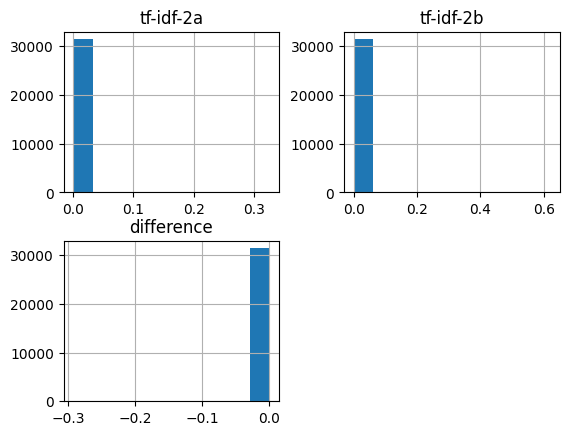

In [92]:
df_combined_2_grams['difference'] = df_combined_2_grams['tf-idf-2a'] - df_combined_2_grams['tf-idf-2b']

print(df_combined_2_grams)

df_combined_2_grams.hist()

In [97]:
#test
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
test_1_grams = tf_idf_table_1(corpus,1)

test_1_grams.sort_values(by=['tf-idf-2a'])

,tf-idf-2a
and,0.000000
one,0.000000
second,0.000000
third,0.000000
is,0.167201
the,0.167201
this,0.167201
document,0.215302
first,0.283096


1. smooth_idf (default=True):

Function: Controls smoothing of IDF weights during calculation.

Modification:
True (default): Applies smoothing, reducing the impact of very rare terms and potentially improving stability.
False: Disables smoothing, resulting in potentially higher weights for very rare terms, which might be more sensitive to noise. Expected Result Differences:
With smooth_idf=False, terms that appear only in a few documents might have much higher weights compared to smooth_idf=True. This could be beneficial for identifying very specific keywords, but also more susceptible to noise.
2. sublinear_tf (default=True):

Function: Controls scaling of term frequencies (TF) using a sublinear function (logarithmic by default).

Modification:
True (default): Applies sublinear scaling, down-weighting the impact of frequently occurring terms in a document. This emphasizes the importance of less frequent terms that might be more informative.
False: Disables sublinear scaling, giving more weight to terms that appear frequently within a document. Expected Result Differences:
With sublinear_tf=False, terms appearing many times in a document will have a proportionally larger impact on the TF-IDF weight compared to sublinear_tf=True. This might be useful if the frequency within a document itself is informative, but could lead to less emphasis on less frequent but potentially more discriminative terms.
3. norm (default='l2'):

Function: Controls normalization of TF-IDF vectors

Modification:
'l2' (default): Normalizes vectors to unit length using L2 norm (Euclidean distance).
'l1': Normalizes vectors to unit length using L1 norm (Manhattan distance).
None: No normalization applied. Expected Result Differences:
Normalization (norm='l2' or norm='l1') can affect the similarity scores between documents during subsequent analysis (e.g., cosine similarity). The choice depends on the specific application and distance metric used. Disabling normalization (norm=None) might be useful if the raw TF-IDF weights themselves are of interest.

### 2.c Which words has the lowest and the highest tf-idf values ? Do they differ from $n$-grams results ?




1.   Which words has the lowest and the highest tf-idf values ?
- All the words have the same as tf-idf values.

2.    Do they differ from  n -grams results ?
- No, they don't


### 2.d Which limitations from $n$-grams that TF-IDF overcame ? Does TF-IDF remain any limitations ?



1.   Limitations of N-grams Addressed by TF-IDF:
- Data Sparsity
- Focus on Frequency
- Lack of Semantics:
N-grams don't capture the semantic meaning of words or phrases.
2.   Limitations of TF-IDF:
- Short-sightedness
- Sensitivity to Noise: Very rare terms might be assigned high weights due to their low document frequency
- Parameter Tuning: Choosing the right settings requires experimentation and domain knowledge.



